## **GoalZone: Predicting Attendance Rate for Each Fitness Class**
![gym](https://images.unsplash.com/photo-1540497077202-7c8a3999166f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2340&q=80)
Image: [@Humphrey Muleba](https://unsplash.com/@good_citizen)
## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data comes from DataCamp as a part of their Data Science Certificate Project.

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

Let's load the necessary libraries and read the CSV file. Also, let's print the shape and view the first 5 rows of the file.

In [1]:
# import all needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the data

df = pd.read_csv("/kaggle/input/goalzone-fitness-classes-attendance/fitness_class.csv")

# print the number of rows & columns

print("\nThe dataset has {} rows and {} columns.\n".format(df.shape[0], df.shape[1]))

# view the first few rows

df.head()


The dataset has 765 rows and 9 columns.



,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7


## Data Validation

The dataset contains **765 rows and 9 columns with no missing values**. Furthermore, the dataset requires **two corrections.** After corrections, there are **762 rows and 9 columns with no missing values.**

I've taken these steps to validate the dataset:

| Column Name                     | Validation Description                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | No change. Values are from “Mon” to “Sun” which matches earlier description.                                                                                      |
| Time                            | No change. Values are either "AM" or "PM" which matches earlier description.                                                                                                        |
| Class Category                  | No change. Values are “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | No change. Values range from 1 to 5.                                                                                                       |
| Class Capacity                  | **Corrected.** Values are either 15 or 25.  Class capacity 26 now updated to 25.                                         |
| Attendance                      | No change. Number of members actually attended the class.                                                                                                                         |
| Average Age                     | **Corrected.** Average age of the members signing up for that class.  Rows with less than an average of 14 were removed.  |
| Number of New Students          | No change. Number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | No change. Number of members with more than 6 months membership.                                                                              |                                                                                     |

### Original Dataset

In [2]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     765 non-null    object 
 1   time            765 non-null    object 
 2   class_category  765 non-null    object 
 3   class_capacity  765 non-null    int64  
 4   days_before     765 non-null    int64  
 5   attendance      765 non-null    int64  
 6   age             765 non-null    float64
 7   new_students    765 non-null    int64  
 8   over_6_month    765 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 53.9+ KB


### No Missing Data

In [3]:
# the counts of missing values in each column

df.isna().sum()

day_of_week       0
time              0
class_category    0
class_capacity    0
days_before       0
attendance        0
age               0
new_students      0
over_6_month      0
dtype: int64

### Unique Values for Categorical Variables & MAX and MIN for Numeric Values

In [4]:
# datasets columns with their unique and numeric values each

print("\nUnique categories:\n")
print("day_of_week: ", df.day_of_week.unique().tolist())
print("class_category: ", df.class_category.unique().tolist())
print("class_capacity: ", df.class_capacity.unique().tolist(), "## 26 is invalid")
print("days_before: ", df.days_before.unique().tolist())

print("\nNumeric values:\n")
print("Max & min attendance: ", df.attendance.max(), "&", df.attendance.min())
print("Max & min avg. age: ", df.age.max(), "&", df.age.min(), "## min should be >= 14")
print("Max & min new_students: ", df.new_students.max(), "&", df.new_students.min())
print("Max & min over_6_month: ", df.over_6_month.max(), "&", df.over_6_month.min(), "\n")


Unique categories:

day_of_week:  ['Wed', 'Sun', 'Mon', 'Tue', 'Thu', 'Sat', 'Fri']
class_category:  ['Yoga', 'Aqua', 'Strength', 'HIIT', 'Cycling']
class_capacity:  [15, 25, 26] ## 26 is invalid
days_before:  [1, 3, 5, 4, 2]

Numeric values:

Max & min attendance:  21 & 4
Max & min avg. age:  48.8 & 8.3 ## min should be >= 14
Max & min new_students:  11 & 1
Max & min over_6_month:  13 & 2 



### Correcting the Two Values from Above
+ class_capacity 26 changed to 25
+ Avg. age values below 14 are dropped

In [5]:
# correct class_capacity 26 values to 25

df['class_capacity'].loc[df['class_capacity'] == 26] = 25

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
# drop rows with less than 14 avg. age 

print("\nThese are the rows with the incorrect age averages: \n")

display(df.loc[df['age'] < 14])
df.drop([55, 104, 165], inplace=True)


These are the rows with the incorrect age averages: 



,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
55,Fri,AM,Strength,25,4,21,8.3,7,11
104,Sat,PM,Yoga,25,1,21,13.6,6,10
165,Thu,AM,Yoga,25,3,20,11.3,9,11


In [7]:
# the columns with corrected values

print("\nclass_capacity: ", df.class_capacity.unique().tolist())
print("Max & min avg. age: ", df.age.max(), "&", df.age.min(), "\n")


class_capacity:  [15, 25]
Max & min avg. age:  48.8 & 14.0 



In [8]:
# print the number of rows & columns after corrections

print("\nThe dataset now has {} rows and {} columns.\n".format(df.shape[0], df.shape[1]))


The dataset now has 762 rows and 9 columns.



### A Post-correction Data Description

In [9]:
# dataframe description post-corrections

df.describe(include='all').fillna('')

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
count,762,762,762,762.0,762.0,762.0,762.0,762.0,762.0
unique,7,2,5,,,,,,
top,Thu,PM,Yoga,,,,,,
freq,126,395,173,,,,,,
mean,,,,17.506562,2.547244,9.519685,29.163648,5.912073,7.565617
std,,,,4.336755,1.355768,3.841164,5.812547,1.788821,1.968617
min,,,,15.0,1.0,4.0,14.0,1.0,2.0
25%,,,,15.0,1.0,7.0,25.3,5.0,6.0
50%,,,,15.0,2.0,9.0,29.0,6.0,8.0
75%,,,,22.5,4.0,11.0,33.2,7.0,9.0


## Exploratory Data Analysis (EDA)

### Here are the insights I learned after the EDA:
- **In graph 1**, we see a lot of the classes that are fully booked are one day before they start. We also see that all days have enough counts in the dataset.
- **In graph 2**, most of the data come from classes that have capacity of 15. Since there are about 30% classes of size 25, it should not be a major problem for our prediction model.
- Attendance is concentrated between 4 & 13 attendees **in graph 3**.
- **In graph 4**, we see a lot of the smaller classes that are fully booked last-minute (the day before).
- **Graph 5 shows perhaps the most important predictor.** The older the group's average age is, the more absentees a given class will have on average.*
- **Graph (6-7)** may indicate that some classes should not be offered all the time. Strenuous classes like HIIT & Cycling have more absentees at night than during the day in bigger classes **(graph 6)**. PM Cycling (again) & AM Aqua have more absentees than their time counterpart classes in smaller classes **(graph 7)**.*

*\*To better model the data and arrive at these insights, I created an absence column that has the number of absentees. This was calculated by subtracting the attendance from the class capacity.*

In [10]:
# the head of the data again

df.head()

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7


### Graph 1: Days Before Classes Start

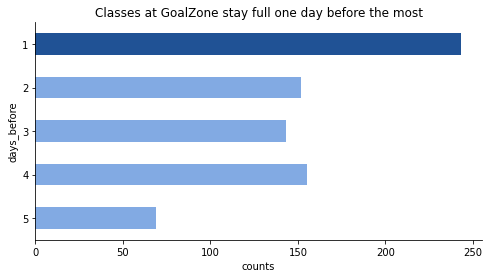

In [11]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# a bar chart for counts of each day classes stayed full

colors = ['#82AAE3', '#82AAE3', '#82AAE3', '#82AAE3', '#205295']

df['days_before'].value_counts()\
                 .sort_index(ascending=False)\
                 .plot\
                 .barh(title='Classes at GoalZone stay full one day before the most', 
                       figsize=(8,4), 
                       color=colors)

sns.despine()
plt.xlabel('counts')
plt.ylabel('days_before');

### Graph 2: Classes Size 15 are the Majority

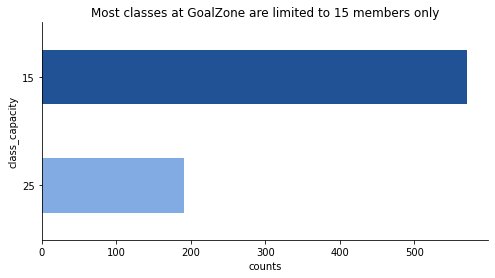

In [12]:
# counts of classes by capacity

colors = ['#82AAE3', '#205295']

df['class_capacity'].value_counts(ascending=True)\
                    .plot\
                    .barh(title='Most classes at GoalZone are limited to 15 members only', 
                          figsize=(8,4), 
                          color=colors)

sns.despine()
plt.xlabel('counts')
plt.ylabel('class_capacity');

### Graph 3: Attendance is Between 4 & 13

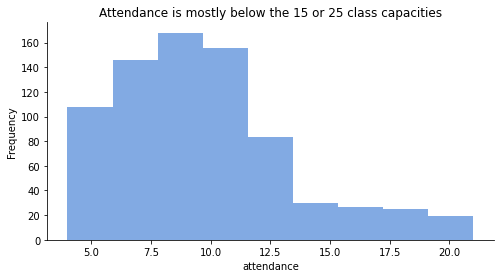

In [13]:
# a histogram for attendance

df['attendance'].sort_values()\
                .plot\
                .hist(title='Attendance is mostly below the 15 or 25 class capacities', 
                      figsize=(8,4), 
                      color='#82AAE3', 
                      bins=9)

sns.despine()
plt.xlabel('attendance');

### Graph 4: Smaller Classes are Fully Booked One Day Before the Most

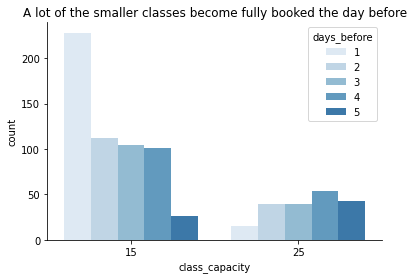

In [14]:
# a count of each class capacity by days_before

sns.countplot(data=df, 
              x='class_capacity', 
              hue='days_before', 
              palette=sns.color_palette("Blues"))

plt.title('A lot of the smaller classes become fully booked the day before')
sns.despine();

### New Column: The Number of Absentees per Class

In [15]:
# adding number of absentees into a new df for a clearer plot

df2 = df.copy()

df2['absence'] = df2['class_capacity'] - df2['attendance']

### Graph 5: The Older the Class Cohort, the More Absences that Class Will Have

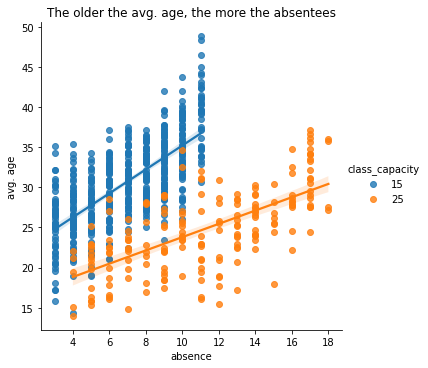

In [16]:
# a lmplot of avg. age and absentees in each class capacity

sns.lmplot(data=df2, 
           x='absence', 
           y='age', 
           hue='class_capacity')

plt.ylabel('avg. age')
plt.title('The older the avg. age, the more the absentees');

### Graph 6: Members attend HIIT & Cycling Classes Noticeably Less at PM Hours in the Bigger Classes

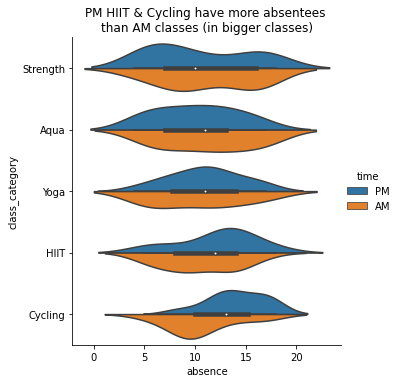

In [17]:
# dist. plot for absentees in the bigger classes

sns.catplot(data=df2[df2['class_capacity']==25], 
            x='absence', 
            y='class_category', 
            hue='time', 
            kind="violin", 
            split=True, 
            palette=["C0", "C1"])

plt.title('PM HIIT & Cycling have more absentees \nthan AM classes (in bigger classes)');

### Graph 7: Members attend PM Cycling & AM Aqua Less than their Time Counterparts in Smaller Classes.

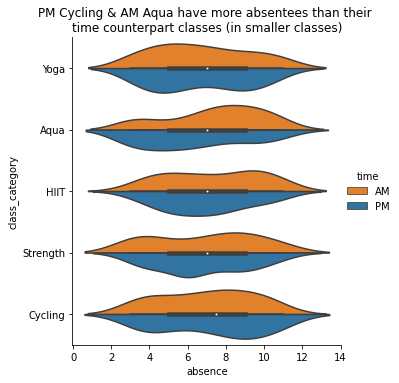

In [18]:
# dist. plot for absentees in the smaller classes

sns.catplot(data=df2[df2['class_capacity']==15], 
            x='absence', 
            y='class_category', 
            hue='time', 
            kind="violin", 
            split=True,
            palette=["C1", "C0"])

plt.title('PM Cycling & AM Aqua have more absentees than their \ntime counterpart classes (in smaller classes)');

## Model Fitting

### My Prediction Models
- **Regression Problem:** Predicting the attendance rate for each class is a regression problem in machine learning. 
- I will use the **LinearRegression** as baseline model for its simplicity. 
- Then, I will use the **LassoCV** model as a comparison model to see if cross validation and reduction of unnecessary parameters in the model can help produce better model than LinearRegression.

In [19]:
# Model Fitting
# LinearRegression, as a baseline model
# LassoCV, as a comparison model

# create dummy variables for category data
data = pd.get_dummies(df)
data.head()

,class_capacity,days_before,attendance,age,new_students,over_6_month,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,class_category_Aqua,class_category_Cycling,class_category_HIIT,class_category_Strength,class_category_Yoga
0,15,1,8,31.1,6,4,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1,15,3,8,27.0,7,8,0,0,0,1,0,0,0,0,1,1,0,0,0,0
2,15,5,10,22.4,8,7,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,25,3,18,23.5,7,9,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,15,5,10,29.8,5,7,0,1,0,0,0,0,0,1,0,0,0,0,0,1


### Splitting the Dataset into Train & Test Datasets

In [20]:
# import needed libraries

from sklearn import model_selection
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split

# split the data into X & y

X = data.drop('attendance', axis=1)
y = data['attendance']

In [21]:
# split the data to train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=2023)

### Method 1: Linear Regression Model

In [22]:
# train a simple linear regression model

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# predict

linreg_y_pred = linreg.predict(X_test)

### Method 2: Lasso Regression with CV Model
CV for Cross-validation

In [23]:
# train a lasso model

lasso = LassoCV(n_alphas=10, cv=50)
lasso.fit(X_train, y_train)

# predict

lasso_y_pred = lasso.predict(X_test)

## Model Evaluation

### Evaluating My Models
- I will use $R^2$ Score as a metric to compare both models. $R^2$ Score is a simple and interpretable metric to evaluate regression models. A $R^2$ score can be between 0 to 1. Close to 1 score shows better fitted model.
- **Finding:** Using the $R^2$ Score, the LinearRegression model scored around 70% while the LassoCV model scored around 68%. Here, **the LinearRegression model wins**, but with slight lead over the LassoCV model.

In [24]:
# Model Evaluation
# R2 score, as a metric

# R2 score which lies between 0 to 1. Close to 1 score shows better fitted model

from sklearn.metrics import r2_score
print('\nLinearRegression r2 score:', r2_score(linreg_y_pred, y_test))
print('\nLassoCV r2 score:', r2_score(lasso_y_pred, y_test))


LinearRegression r2 score: 0.6955865783574761

LassoCV r2 score: 0.6801214284168913
